<a href="https://colab.research.google.com/github/Avni-0101/CNN_DL/blob/main/MultiClass_ification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multi Class Classification**

Weather dataset having 4 classes -> Cloudy, Rain, Shine, Sunrise.

**STRUCTURE in my drive is as follows:**

*Weather* folder has *Train* and *Test* folders. *Train* folder contains the 4 classes. *Test* folder has 4 images fron each class.


**My Vision:** Live updates of weather in america will ensure safety from natural disasters like tornados, extreme heat, flames/smoke from nearby forest fires and likewise. Basic tool for that will be image classification of various weather conditions. Alerts or alarms also can be generated in the city for adverse change in weather.


**Colab link -** [https://colab.research.google.com/drive/1xId02cpJ8NJJDhmqBsiNuc5OZIiApnhT?usp=sharing](https://)



**Dataset link:** [https://www.kaggle.com/datasets/pratik2901/multiclass-weather-dataset](https://)

---


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = '/content/drive/MyDrive/Dataset/Weather/Train'

valid_path = '/content/drive/MyDrive/Dataset/Weather/Validation'

test_path =  '/content/drive/MyDrive/Dataset/Weather/Test'

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path,target_size=(224,224),classes=['Cloudy','Rain','Shine','Sunrise'],batch_size=50,shuffle = True)

valid_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path,target_size=(224,224),classes=['Cloudy','Rain','Shine','Sunrise'],batch_size=10,shuffle = True)

test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path,target_size=(224,224),classes=['Cloudy','Rain','Shine','Sunrise'],batch_size=10,shuffle=False)

Found 1065 images belonging to 4 classes.
Found 40 images belonging to 4 classes.
Found 20 images belonging to 4 classes.


In [ ]:
imgs,labels=next(train_batches)

In [ ]:
# this fncn will plot imgs in the form of 1x10 where imgs are placed
def plotImages(images_arr):
  fig,axes=plt.subplots(1,10,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(images_arr,axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

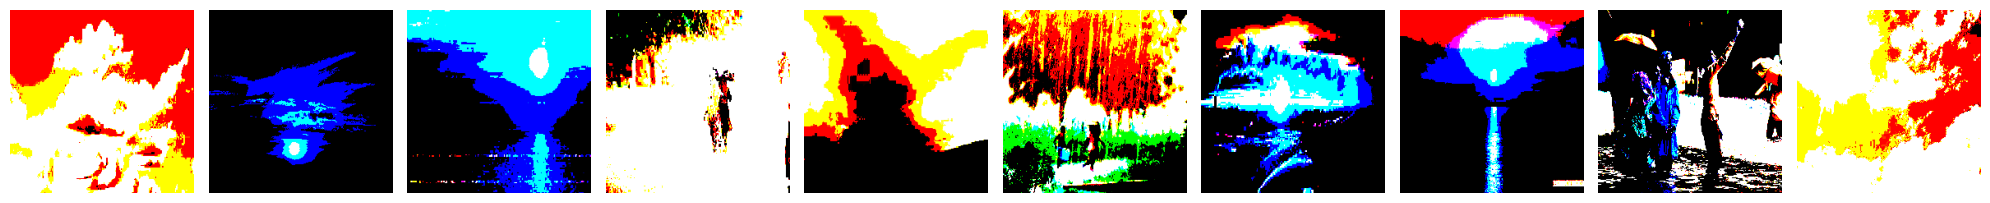

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


In [ ]:
import matplotlib.pyplot as plt

plotImages(imgs)
print(labels)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Flatten,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import binary_crossentropy

In [ ]:
model=Sequential([
                  Conv2D(filters=16,kernel_size=(3,3),activation='tanh',padding='same',input_shape=(224,224,3)), #param=(3*3*3+1)*16
                  MaxPool2D(pool_size=(2,2),strides=2),
                  Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'),  #param=(3*3*16+1)*32
                  MaxPool2D(pool_size=(2,2),strides=2),
                  Flatten(),
                  Dense(units=32,activation='softmax'), #param=size of flatten*4+4
                  Dense(units=4,activation='softmax'), #param=size of flatten*4+4
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 32)                3

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x=train_batches,validation_data = valid_batches,epochs=10,verbose=1)

Epoch 1/10
22/22 [==============================] - 205s 9s/step - loss: 0.6366 - accuracy: 0.4826 - val_loss: 0.6293 - val_accuracy: 0.4750
Epoch 2/10
22/22 [==============================] - 9s 413ms/step - loss: 0.6250 - accuracy: 0.5146 - val_loss: 0.6272 - val_accuracy: 0.5000
Epoch 3/10
22/22 [==============================] - 8s 367ms/step - loss: 0.6224 - accuracy: 0.5512 - val_loss: 0.6242 - val_accuracy: 0.5000
Epoch 4/10
22/22 [==============================] - 9s 388ms/step - loss: 0.6187 - accuracy: 0.6310 - val_loss: 0.6228 - val_accuracy: 0.5250
Epoch 5/10
22/22 [==============================] - 9s 385ms/step - loss: 0.6160 - accuracy: 0.6920 - val_loss: 0.6219 - val_accuracy: 0.6000
Epoch 6/10
22/22 [==============================] - 9s 415ms/step - loss: 0.6135 - accuracy: 0.7127 - val_loss: 0.6222 - val_accuracy: 0.6000
Epoch 7/10
22/22 [==============================] - 9s 393ms/step - loss: 0.6111 - accuracy: 0.7315 - val_loss: 0.6199 - val_accuracy: 0.6000
Epoch 8

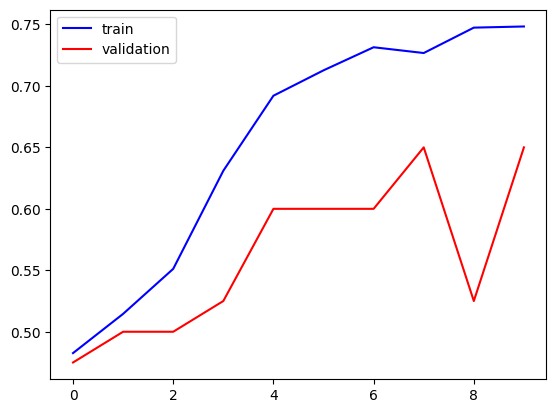

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='blue',label='train')
plt.plot(history.history['val_accuracy'],color='red',label='validation')
plt.legend()
plt.show()

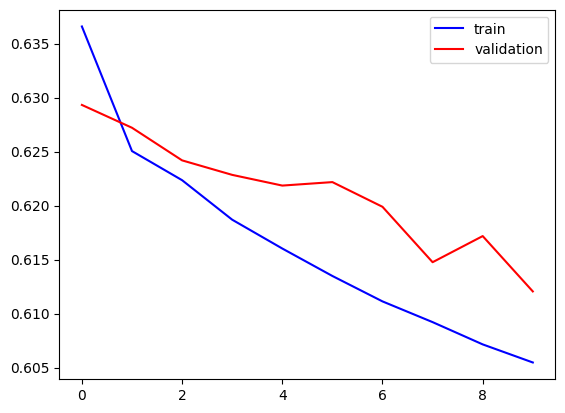

In [ ]:

plt.plot(history.history['loss'],color='blue',label='train')
plt.plot(history.history['val_loss'],color='red',label='validation')
plt.legend()
plt.show()

In [ ]:
#predictions=model.predict(test_img)
predictions=model.predict(x=test_batches,verbose="auto")

2/2 [==============================] - 2s 2s/step


In [ ]:
predictions

array([[0.33149958, 0.20644948, 0.29414463, 0.16790633],
       [0.33152872, 0.20644757, 0.29414594, 0.16787773],
       [0.33152395, 0.20644993, 0.2941447 , 0.16788144],
       [0.32533664, 0.2068262 , 0.29380733, 0.17402986],
       [0.25058368, 0.20527205, 0.2812708 , 0.26287344],
       [0.22778878, 0.25479713, 0.2537921 , 0.26362193],
       [0.22778969, 0.25479513, 0.2537932 , 0.26362202],
       [0.22778943, 0.25479686, 0.25379246, 0.2636212 ],
       [0.22778817, 0.254796  , 0.25379106, 0.26362473],
       [0.22778922, 0.25479695, 0.25379238, 0.26362148],
       [0.25027266, 0.2052396 , 0.28118312, 0.2633046 ],
       [0.25027448, 0.2052398 , 0.28118363, 0.2633021 ],
       [0.27870935, 0.2072547 , 0.2879269 , 0.226109  ],
       [0.20025344, 0.2088575 , 0.2111543 , 0.37973478],
       [0.25048643, 0.20526189, 0.28124344, 0.2630083 ],
       [0.20025334, 0.20885736, 0.21115413, 0.3797352 ],
       [0.20025335, 0.20885739, 0.21115416, 0.37973508],
       [0.20025332, 0.20885734,

In [ ]:
for [a,b,c,d] in predictions:
  ans = max(max(a,b),max(c,d))
  if(ans==a):
    print('Cloudy')
  elif(ans==b):
    print('Rain')
  elif(ans==c):
    print('Shine')
  elif(ans==d):
    print('Sunrise')



Cloudy
Cloudy
Cloudy
Cloudy
Shine
Sunrise
Sunrise
Sunrise
Sunrise
Sunrise
Shine
Shine
Shine
Sunrise
Shine
Sunrise
Sunrise
Sunrise
Sunrise
Sunrise


In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
cm=confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=-1))

In [ ]:

def plot_confusion_matrix(cm,classes,normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

  """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes, rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix,without Normalization')
    print(cm)


    thresh = cm.max()-cm.min() / 2 + cm.min()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")



    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix,without Normalization
[[4 0 1 0]
 [0 0 0 5]
 [0 0 4 1]
 [0 0 0 5]]


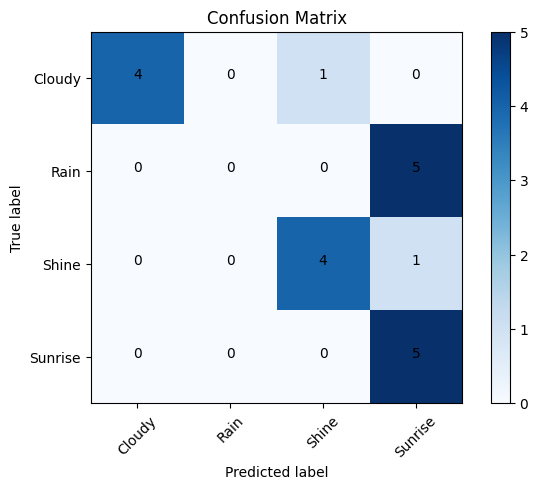

In [ ]:
cm_plot_labels=['Cloudy','Rain','Shine','Sunrise']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')